In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## NumPy Examples

### Array Creation

In [2]:
# array creation by sequence
A = np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [3]:
# pre-format arrays with zeros/ones
A = np.zeros((2,3))
B = np.ones(5) 
C = np.zeros(shape=(100,100), dtype=float)
D = np.ones((2,2),dtype=np.int16)
E = np.empty((2,2))
print(A,B)
print(C)
print(D)
print(E)

[[0. 0. 0.]
 [0. 0. 0.]] [1. 1. 1. 1. 1.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1 1]
 [1 1]]
[[5.e-324 5.e-324]
 [5.e-324 0.e+000]]


In [4]:
# creation through ranges 
A = np.arange(2,10,2)
B = np.linspace(0,4.5,10)
print(A,B)

[2 4 6 8] [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


In [5]:
# from random source 
A = np.random.rand(1,2)
B = 2 * np.random.randn(1,2) + 10 # mu = 10, sigma = 2 
print(A,B)

[[0.4609496  0.68202327]] [[13.07802545 10.93807554]]


In [6]:
# array attributes
print(A.ndim, A.shape, A.size, A.dtype, A.itemsize, A.data)

2 (1, 2) 2 float64 8 <memory at 0x7f25489a6ea0>


### Manipulations

In [7]:
# reshape array
A = np.arange(12).reshape(4,3)
print(A)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [8]:
A = np.arange(9).reshape(3,3)
B = np.arange(9).reshape(3,3)

In [9]:
# 1d slicing
A = np.arange(10)
A[2:5]

array([2, 3, 4])

In [10]:
# select row 1 and column 1
A = np.arange(9).reshape(3,3)
A, A[1], A[:,1]

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]), array([3, 4, 5]), array([1, 4, 7]))

In [11]:
# iterating
for i in A: 
    print (i**2)

[0 1 4]
[ 9 16 25]
[36 49 64]


In [12]:
# iterating alternative
[i**2 for i in A]

[array([0, 1, 4]), array([ 9, 16, 25]), array([36, 49, 64])]

In [13]:
# 2d iterating (wrt first axis)
A = np.arange(9).reshape(3,3)
[i**2 for i in A]

[array([0, 1, 4]), array([ 9, 16, 25]), array([36, 49, 64])]

In [14]:
# 2d iterating (flat)
[i**2 for i in A.flat]

[0, 1, 4, 9, 16, 25, 36, 49, 64]

In [15]:
# reshaping
A = np.floor(10*np.random.random((3,4)))
print(A, A.shape)
print(A.ravel()) # flatten array
print(A.reshape(6,2)) 
print(A.T, A.T.shape)

[[9. 3. 1. 2.]
 [2. 0. 8. 2.]
 [9. 0. 4. 1.]] (3, 4)
[9. 3. 1. 2. 2. 0. 8. 2. 9. 0. 4. 1.]
[[9. 3.]
 [1. 2.]
 [2. 0.]
 [8. 2.]
 [9. 0.]
 [4. 1.]]
[[9. 2. 9.]
 [3. 0. 0.]
 [1. 8. 4.]
 [2. 2. 1.]] (4, 3)


In [16]:
# use resize to reshape in place
B = A 
A.resize(2,6)
print(A)
B.reshape(3,-1) # -1 calc cols automatically
print(B)

[[9. 3. 1. 2. 2. 0.]
 [8. 2. 9. 0. 4. 1.]]
[[9. 3. 1. 2. 2. 0.]
 [8. 2. 9. 0. 4. 1.]]


In [17]:
# stacking
A = np.floor(10*np.random.random((3,4)))
B = np.floor(10*np.random.random((3,4)))
print(A)
print(B)
C = np.vstack((A,B))
print(C)
D = np.hstack((A,B))
print(D)

[[3. 4. 3. 2.]
 [0. 4. 9. 0.]
 [2. 1. 9. 5.]]
[[6. 4. 4. 7.]
 [1. 4. 7. 1.]
 [4. 6. 0. 7.]]
[[3. 4. 3. 2.]
 [0. 4. 9. 0.]
 [2. 1. 9. 5.]
 [6. 4. 4. 7.]
 [1. 4. 7. 1.]
 [4. 6. 0. 7.]]
[[3. 4. 3. 2. 6. 4. 4. 7.]
 [0. 4. 9. 0. 1. 4. 7. 1.]
 [2. 1. 9. 5. 4. 6. 0. 7.]]


In [18]:
# splitting
A = np.floor(10*np.random.random((2,12)))
print("A", A)
B, C, D = np.hsplit(A,3)
print("B", B)
print("C", C)
print("D", D)
E, F, G = np.hsplit(A,(3,4)) # split A after col 3 and col 4
print("E", E)
print("F", F)
print("G", G)

A [[2. 9. 0. 1. 3. 8. 1. 7. 6. 5. 5. 3.]
 [5. 7. 4. 3. 1. 5. 8. 2. 9. 5. 3. 5.]]
B [[2. 9. 0. 1.]
 [5. 7. 4. 3.]]
C [[3. 8. 1. 7.]
 [1. 5. 8. 2.]]
D [[6. 5. 5. 3.]
 [9. 5. 3. 5.]]
E [[2. 9. 0.]
 [5. 7. 4.]]
F [[1.]
 [3.]]
G [[3. 8. 1. 7. 6. 5. 5. 3.]
 [1. 5. 8. 2. 9. 5. 3. 5.]]


### Questions

In [19]:
# logic check
A > 2

array([[False,  True, False, False,  True,  True, False,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True, False,  True,  True, False,  True,
         True,  True,  True]])

### Ordering

In [20]:
# sort
a = np.floor(10*np.random.random((2,6)))
print(a)
# sort - row wise
b = np.sort(a)
print(b)

[[1. 0. 2. 4. 2. 4.]
 [1. 0. 5. 6. 2. 3.]]
[[0. 1. 2. 2. 4. 4.]
 [0. 1. 2. 3. 5. 6.]]


In [21]:
# sort - col wise
c = np.sort(a, axis=0)
print(c)

[[1. 0. 2. 4. 2. 3.]
 [1. 0. 5. 6. 2. 4.]]


In [22]:
# sort flatten
d = np.sort(a, axis=None)
print(d)

[0. 0. 1. 1. 2. 2. 2. 3. 4. 4. 5. 6.]


### Operations

In [23]:
# element wise add 
B = A
C = A + B
print(C)

[[ 4. 18.  0.  2.  6. 16.  2. 14. 12. 10. 10.  6.]
 [10. 14.  8.  6.  2. 10. 16.  4. 18. 10.  6. 10.]]


In [24]:
# element wise mult
C = A * 4
print(C)

[[ 8. 36.  0.  4. 12. 32.  4. 28. 24. 20. 20. 12.]
 [20. 28. 16. 12.  4. 20. 32.  8. 36. 20. 12. 20.]]


In [25]:
# element wise f()
def f(x):
    return 3*x**2 - 2*x + 7
f(A)

array([[ 15., 232.,   7.,   8.,  28., 183.,   8., 140., 103.,  72.,  72.,
         28.],
       [ 72., 140.,  47.,  28.,   8.,  72., 183.,  15., 232.,  72.,  28.,
         72.]])

In [26]:
# function apply on linspace
x = np.linspace(0, 2*3.14, 10)
f = np.sin(x)
f

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012,
       -0.34035671, -0.86496168, -0.98523494, -0.644954  , -0.0031853 ])

In [27]:
# inplace 
A *= 2
print(A)

[[ 4. 18.  0.  2.  6. 16.  2. 14. 12. 10. 10.  6.]
 [10. 14.  8.  6.  2. 10. 16.  4. 18. 10.  6. 10.]]


In [28]:
# sums along axis
print(A)
print(A.sum(axis=0)) # sum col
print(A.sum(axis=1)) # sum row
print(A.cumsum(axis=1)) # cumulative sum row

[[ 4. 18.  0.  2.  6. 16.  2. 14. 12. 10. 10.  6.]
 [10. 14.  8.  6.  2. 10. 16.  4. 18. 10.  6. 10.]]
[14. 32.  8.  8.  8. 26. 18. 18. 30. 20. 16. 16.]
[100. 114.]
[[  4.  22.  22.  24.  30.  46.  48.  62.  74.  84.  94. 100.]
 [ 10.  24.  32.  38.  40.  50.  66.  70.  88.  98. 104. 114.]]


In [29]:
# broadcast row vector on all rows
A = np.ones((5,5))
B = A + [1, 2, 3, 4, 5]
B

array([[2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.]])

In [30]:
# universial functions 
print(np.exp(A))
print(np.sqrt(A))

[[2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


### Basic Statistics

In [31]:
# stats properties
A = np.arange(9).reshape(3,3)
print(A.sum(), A.min(), A.max())

36 0 8


In [32]:
# time example
time = np.linspace(20, 145, 5)
data = np.sin(np.arange(20)).reshape(5,4) 
print(time)
print(data)

[ 20.    51.25  82.5  113.75 145.  ]
[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]


In [33]:
ind = data.argmax(axis=0) # get max index for each series (col)
time_max = time[ind] # times corresponding to maxima
print(ind)
print(time_max)

[2 0 3 1]
[ 82.5   20.   113.75  51.25]


### Basic Linear Algebra

In [34]:
# matrix product
A = B
A @ B

array([[ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.]])

In [35]:
# matrix product alt 
A.dot(B)

array([[ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.]])

In [36]:
# matrix
m = np.matrix([[1,-2,3],[0,4,5],[7,8,-9]])
v = np.matrix([[2],[3],[4]])

In [37]:
# transpose
m.T

matrix([[ 1,  0,  7],
        [-2,  4,  8],
        [ 3,  5, -9]])

In [38]:
# inverse
m.I

matrix([[ 0.33043478, -0.02608696,  0.09565217],
        [-0.15217391,  0.13043478,  0.02173913],
        [ 0.12173913,  0.09565217, -0.0173913 ]])

In [39]:
# multiply 
m * v

matrix([[ 8],
        [32],
        [ 2]])

In [40]:
# determinant 
np.linalg.det(m)

-229.99999999999983

In [41]:
# eigenvalues
np.linalg.eigvals(m)

array([-13.11474312,   2.75956154,   6.35518158])

In [42]:
# Solve for x in mx = v
np.linalg.solve(m, v)

matrix([[0.96521739],
        [0.17391304],
        [0.46086957]])

## Pandas Examples

### Create

In [43]:
# DF from dictionary 
ex1 = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df1 = pd.DataFrame(ex1)
df1

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [44]:
ex2 = {'one' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd']),
     'two' : pd.Series([1., 2., 3.], index=['a', 'b', 'c'])}
df2 = pd.DataFrame(ex2)
df2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,4.0,NaN


In [45]:
# define DF from random numbers 
dfr1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
dfr2 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
dfr1

,A,B,C,D
0,1.961742,1.294442,0.167313,0.873621
1,-0.433168,-1.230744,1.707297,-0.428382
2,-0.073437,-1.522129,-0.397017,1.150849
3,-0.130399,-0.938335,-0.110882,2.662874
4,-1.763427,-0.222606,-0.501820,-0.227612
5,1.037041,1.591052,1.210849,1.707062
6,-0.162413,0.031188,-2.207714,-0.340743
7,0.857735,-0.375710,1.154555,0.891019
8,-1.705307,-0.128170,1.032423,0.832659
9,-0.365288,1.308450,0.118536,-2.926858


In [46]:
# multi-index frame (dict of tuples)
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
    ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
    ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
    ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
    ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### Combining

In [47]:
# simple addition
dfSum1 = df1 + df1
dfSum1

,one,two
a,2.0,2.0
b,4.0,4.0
c,6.0,6.0
d,NaN,8.0


In [48]:
# addition with 2 different DFs
dfSum2 = df1 + df2
dfSum2

,one,two
a,2.0,2.0
b,4.0,4.0
c,6.0,6.0
d,NaN,NaN


In [49]:
# operations automatically align the data based on label
df1[1:] + df1[:-1]

,one,two
a,NaN,NaN
b,4.0,4.0
c,6.0,6.0
d,NaN,NaN


In [50]:
# create new column from existing columns
df3 = df1
df3['three'] = df3['one'] * df3['two']
df3

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [51]:
# append boolean column based on conditional 
df3['flag'] = df3['one'] > 2
df3

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [52]:
# append scalar
df3['five'] = 6.
df3

,one,two,three,flag,five
a,1.0,1.0,1.0,False,6.0
b,2.0,2.0,4.0,False,6.0
c,3.0,3.0,9.0,True,6.0
d,NaN,4.0,NaN,False,6.0


In [53]:
# append random series 
df3['random'] = pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd'])
df3

,one,two,three,flag,five,random
a,1.0,1.0,1.0,False,6.0,-0.055390
b,2.0,2.0,4.0,False,6.0,-1.240197
c,3.0,3.0,9.0,True,6.0,1.038987
d,NaN,4.0,NaN,False,6.0,0.064394


In [54]:
# append using assign from precomputing values (not persistent)
df3.assign(ratio = (df3.one / df3.random))

,one,two,three,flag,five,random,ratio
a,1.0,1.0,1.0,False,6.0,-0.055390,-18.053759
b,2.0,2.0,4.0,False,6.0,-1.240197,-1.612648
c,3.0,3.0,9.0,True,6.0,1.038987,2.887428
d,NaN,4.0,NaN,False,6.0,0.064394,NaN


In [55]:
# assign with lambda (not persistent)
df3.assign(ratio_two = lambda x: (x.two / x.random))

,one,two,three,flag,five,random,ratio_two
a,1.0,1.0,1.0,False,6.0,-0.055390,-18.053759
b,2.0,2.0,4.0,False,6.0,-1.240197,-1.612648
c,3.0,3.0,9.0,True,6.0,1.038987,2.887428
d,NaN,4.0,NaN,False,6.0,0.064394,62.117245


In [56]:
# subtract all columns by first column - broadcasting column wise
df3.sub(df3['one'], axis=0)

,one,two,three,flag,five,random
a,0.0,0.0,0.0,-1.0,5.0,-1.055390
b,0.0,0.0,2.0,-2.0,4.0,-3.240197
c,0.0,0.0,6.0,-2.0,3.0,-1.961013
d,NaN,NaN,NaN,NaN,NaN,NaN


### Resizing and Reshaping

In [57]:
# pop column (can only run once in notebook)
flag = df3.pop('three')
flag

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [58]:
# transpose column names - get first 5 columns
dfr1[:5].T

,0,1,2,3,4
A,1.961742,-0.433168,-0.073437,-0.130399,-1.763427
B,1.294442,-1.230744,-1.522129,-0.938335,-0.222606
C,0.167313,1.707297,-0.397017,-0.110882,-0.501820
D,0.873621,-0.428382,1.150849,2.662874,-0.227612


In [59]:
# transform into numpy array 
np.asarray(dfr1)

array([[ 1.96174243,  1.29444155,  0.1673125 ,  0.87362118],
       [-0.43316832, -1.23074362,  1.70729705, -0.42838204],
       [-0.07343657, -1.52212945, -0.39701674,  1.15084869],
       [-0.13039857, -0.93833547, -0.11088245,  2.66287421],
       [-1.76342716, -0.22260583, -0.50182042, -0.22761178],
       [ 1.0370405 ,  1.59105166,  1.21084863,  1.70706189],
       [-0.16241296,  0.03118762, -2.20771373, -0.34074304],
       [ 0.85773508, -0.37571002,  1.15455521,  0.89101923],
       [-1.70530693, -0.12817038,  1.03242266,  0.83265869],
       [-0.36528773,  1.30844974,  0.1185358 , -2.92685826]])

### Filtering

In [60]:
# boolean compare elementwise
dfr1.gt(1)

,A,B,C,D
0,True,True,False,False
1,False,False,True,False
2,False,False,False,True
3,False,False,False,True
4,False,False,False,False
5,True,True,True,True
6,False,False,False,False
7,False,False,True,False
8,False,False,True,False
9,False,True,False,False


In [61]:
# boolean compare two DFs
dfr1.gt(dfr2)

,A,B,C,D
0,True,True,True,True
1,False,False,True,False
2,True,False,False,True
3,True,False,True,True
4,False,False,False,True
5,False,True,False,True
6,False,False,False,True
7,True,False,True,True
8,False,True,True,True
9,False,True,True,False


In [62]:
# boolean column reductions
(dfr1 > 1).all()

A    False
B    False
C    False
D    False
dtype: bool

In [63]:
(dfr1 > 1).any()

A    True
B    True
C    True
D    True
dtype: bool

In [64]:
# same does not work 
# TODO - what do (1) mean?
dfr1.sub(dfr1.mean(1), axis=0).div(dfr1.std(1), axis=0)

,A,B,C,D
0,1.179302,0.292562,-1.205220,-0.266644
1,-0.267371,-0.900309,1.431253,-0.263573
2,0.124590,-1.192908,-0.169686,1.238004
3,-0.318043,-0.830716,-0.305659,1.454418
4,-1.476164,0.621003,0.240972,0.614189
5,-1.109581,0.649476,-0.557718,1.017823
6,0.489690,0.676494,-1.483805,0.317621
7,0.329813,-1.471530,0.763295,0.378422
8,-1.371156,-0.108904,0.819970,0.660090
9,0.056591,0.994375,0.327674,-1.378639


In [65]:
# use apply to get mean on rows
dfr1.apply(np.mean, axis=1)

0    1.074279
1   -0.096249
2   -0.210434
3    0.370814
4   -0.678866
5    1.386501
6   -0.669921
7    0.631900
8    0.007901
9   -0.466290
dtype: float64

In [66]:
# get diff min and max on columns
dfr1.apply(lambda x: x.max() - x.min())

A    3.725170
B    3.113181
C    3.915011
D    5.589732
dtype: float64

In [67]:
# get row with max value on columns
dfr1.apply(lambda x: x.idxmax())

A    0
B    5
C    1
D    3
dtype: int64

In [68]:
# apply custom function
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide
dfr1.apply(subtract_and_divide, args=(5,), divide=3)

,A,B,C,D
0,-1.012753,-1.235186,-1.610896,-1.375460
1,-1.811056,-2.076915,-1.097568,-1.809461
2,-1.691146,-2.174043,-1.799006,-1.283050
3,-1.710133,-1.979445,-1.703627,-0.779042
4,-2.254476,-1.740869,-1.833940,-1.742537
5,-1.320986,-1.136316,-1.263050,-1.097646
6,-1.720804,-1.656271,-2.402571,-1.780248
7,-1.380755,-1.791903,-1.281815,-1.369660
8,-2.235102,-1.709390,-1.322526,-1.389114
9,-1.788429,-1.230517,-1.627155,-2.642286


In [69]:
dfr1.agg(np.sum)

A   -0.776920
B   -0.192564
C    2.173539
D    4.194489
dtype: float64

In [70]:
# aggegrate - general form of sum(), here map functions to columns
def mymean(x):
    return x.mean()
dfr1.agg({'A': 'sum', 'B': mymean})

A   -0.776920
B   -0.019256
dtype: float64

In [71]:
# Transform - convert to absolute
dfr1.transform(np.abs)

,A,B,C,D
0,1.961742,1.294442,0.167313,0.873621
1,0.433168,1.230744,1.707297,0.428382
2,0.073437,1.522129,0.397017,1.150849
3,0.130399,0.938335,0.110882,2.662874
4,1.763427,0.222606,0.501820,0.227612
5,1.037041,1.591052,1.210849,1.707062
6,0.162413,0.031188,2.207714,0.340743
7,0.857735,0.375710,1.154555,0.891019
8,1.705307,0.128170,1.032423,0.832659
9,0.365288,1.308450,0.118536,2.926858


In [72]:
# and for series
dfr1.A.transform(np.abs)

0    1.961742
1    0.433168
2    0.073437
3    0.130399
4    1.763427
5    1.037041
6    0.162413
7    0.857735
8    1.705307
9    0.365288
Name: A, dtype: float64

In [73]:
# map()
f = lambda x: x+100
dfr1.A.map(f)
dfr1.applymap(f)

,A,B,C,D
0,101.961742,101.294442,100.167313,100.873621
1,99.566832,98.769256,101.707297,99.571618
2,99.926563,98.477871,99.602983,101.150849
3,99.869601,99.061665,99.889118,102.662874
4,98.236573,99.777394,99.498180,99.772388
5,101.037041,101.591052,101.210849,101.707062
6,99.837587,100.031188,97.792286,99.659257
7,100.857735,99.624290,101.154555,100.891019
8,98.294693,99.871830,101.032423,100.832659
9,99.634712,101.308450,100.118536,97.073142


## Matplotlib Examples

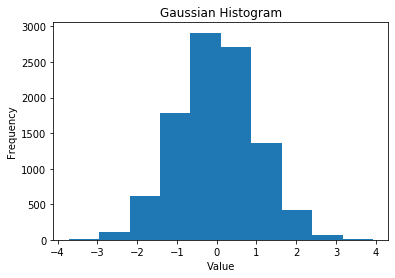

In [74]:
# normal distribution histogram
gaussian_numbers = np.random.randn(10000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

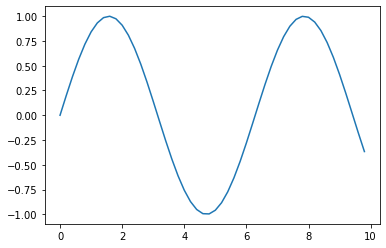

In [75]:
# line plot 
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

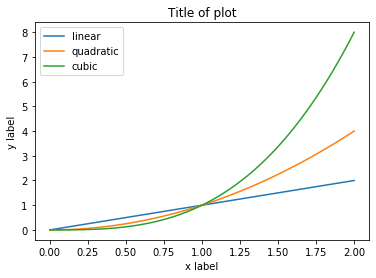

In [76]:
# Multiple plots
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Title of plot")

plt.legend()
plt.show()

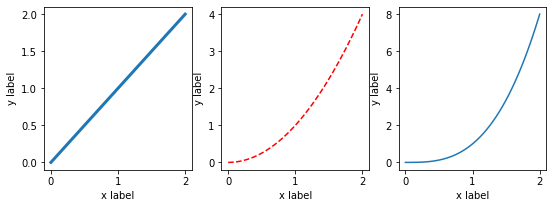

In [77]:
x = np.linspace(0, 2, 100)

plt.figure(1, figsize=(9, 3)) 

plt.subplot(131)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x, label='linear', linewidth=3)

plt.subplot(132)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x**2, 'r--', label='quadratic')

plt.subplot(133)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x**3, label='cubic')

plt.show()

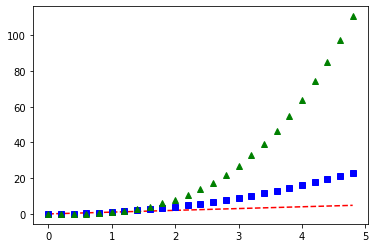

In [78]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()